# 6.1. Using matplotlib styles

This notebook is adapted from the IpPython Cookbook notebook on matplotlib styles.

In [8]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sorted(mpl.style.available)

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [21]:
def doplot():
    """
    Plot 6 different sin waves on ax.
    """
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        ax.plot(x, np.sin(x + i * .5) * (7 - i))
    return ax

<AxesSubplot:>

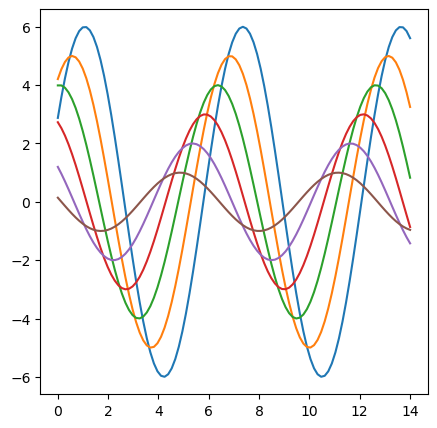

In [23]:
import matplotlib as mpl
sorted(mpl.style.available)
mpl.style.use('default')
doplot()

<AxesSubplot:>

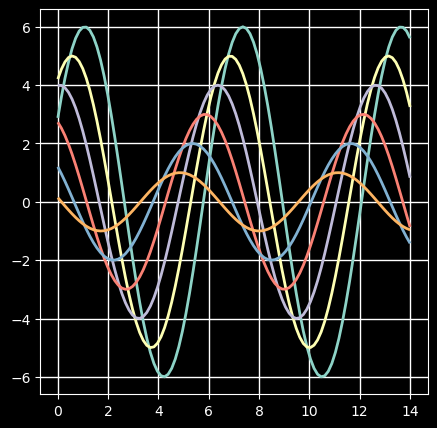

In [37]:
#mpl.style.use('seaborn-dark-palette')
#mpl.style.use('seaborn-darkgrid')
#mpl.style.use('bmh')
#mpl.style.use('Solarize_Light2')
mpl.style.use('dark_background')
doplot()

<AxesSubplot:>

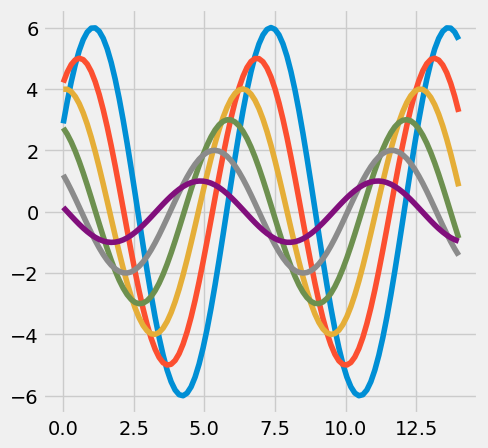

In [4]:
mpl.style.use('fivethirtyeight')
doplot()

One downside of the plots above is that they set the style
in a way that persists until the next time the notebook
is started or the style is reset.

On other hand if you want to use a style one time only,
you can the following.

Text(0.5, 1.0, 'default style')

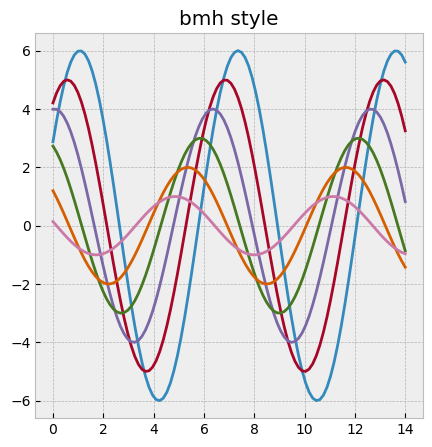

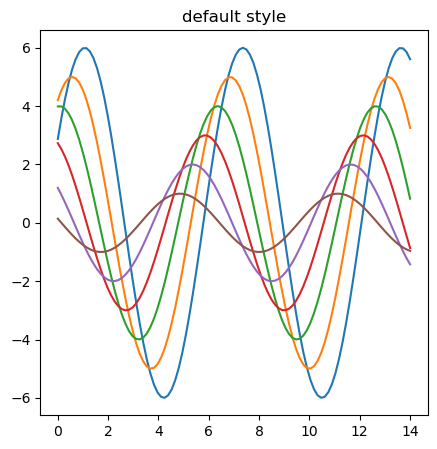

In [33]:
# Set the default style.
mpl.style.use('default')
# Temporarily switch to the ggplot style.
with mpl.style.context('bmh'):
    ax = doplot()
    ax.set_title('bmh style')
# Back to the default style.
ax = doplot()
ax.set_title('default style')

### Creating your own style sheet

In [9]:
cfgdir = matplotlib.get_configdir()
cfgdir

'/Users/gawron/.matplotlib'

We're adding a customized matplotlib style file to the matplotlib styles
directory, which we're creating if we need to.

In [10]:
from pathlib import Path
p = Path(cfgdir)
stylelib = (p / 'stylelib')
stylelib.mkdir(exist_ok=True)
path = stylelib / 'mycustomstyle.mplstyle'

In [18]:
path.write_text('''
axes.facecolor : f0f0f0
font.family : serif
lines.linewidth : 5
xtick.labelsize : 24
ytick.labelsize : 24
''')

107

In [19]:
mpl.style.reload_library()

The following cell updates the params in the ggplot style with those in mycustomstyle.
The gglot params not mentioned are left unchanged.  So this ios basically
a slightly modified version of ggplot style.

It's nice to be abl to do this because writing a complete style file
is a lot of work.  Instead you start with one you basically like
and tweak it.

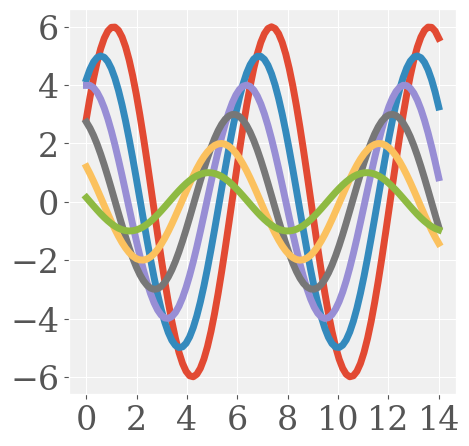

In [20]:
# Update the params in the ggplot style with those in mycustomstyle.
with mpl.style.context(['ggplot', 'mycustomstyle']):
    doplot()

You can try modifying the params in the path.write_text window, then re-executing 
the reload library command, then redrawing the the graph in the previous cell.

Your changes should be reflected in how the graph is drawn.

For example, the labels are a bit large.  Try changing the `labelsize` parameters.